# Lecture 0: Python & Ecosystem

Yes, we're zero indexing!

# Introduction

### Git

Git is a version control system that runs on your computer. You can `commit` changes to the repository and it will save a history of these commits, allowing you to reference them or go back to them at any time. GitHub is a hosting service that essentially backs up your Git repositories (when you `push` to them or `pull` from them) so that you can acccess them from anywhere and there is a reduced chance of data loss. You can also check out other people's GitHub repository by `clone`-ing them.

### Python

There are basically two ways to intall Python. One is the "native" way using whatever facilities exist with your operating system (for OSX this would be homebrew), and then using `pip` to install packages. The other way, which is generally more user-friendly and OSX/Windows friendly is to use the Anaconda distribtuion and `conda` to install packages.

The most bare-bones way to run Python is to just execute `python` in the terminal. Depending on your setup, this might actually run Python 2, which is quite old at this point, so it's often safer to run `python3` explicitly. Anyway, you'll almost never need to do this. At the very least you'll want to run in a more user friendly environment like `IPython` by executing `ipython3`, which is sort of a wrapper around `python3`.

But even then, most of you will prefer to use Jupyterlab. This is a web-based graphical interface that is primary centered on "notebooks", which is what you're looking at now basically. It's just a series of cell (code or markdown) that when run produce some kind of output. Notebooks are a way to store the code you've written and the resulting output in one place.

The other place where Python code might "live" is in Python files, which are just text files with the extension `.py`. If you have a file named `model.py`, you can run its contents directly with `python3 model.py`. If you're in an IPython terminal and you want to run its contents interactively, you can run `run -i model.py`. Finally, you can use it as a module. In this case you can run the Python command `import model` and there will be a new variable `model` that contains any variables defined therein. So if you'd defined `abc = 5` in `model.py` then `model.abc` will be `5`.

### Jupyter

Nowadays, you can do almost everything in Jupyterlab. That can be useful, especially if you're working on a remote machine like the Pitt cluster. However, I must emphasize that you shouldn't be doing everything in notebooks. For suffiently complex code, you'll want to put some portions of it proper Python modules (`.py` files, basically) and import them for usage in a notebook. Thus your notebook will contain mostly high level commands and their resulting outputs.

You can create a new notebook (`.ipynb` file) by clicking on the blue "+" on the left and chooseing a Python version (something like 3.9 or higher is recommended). You can also create other file types like Python (`.py`) or markdown (`.md`) or open a system terminal. Finally, you can edit any of these files by double clicking on them in the filesystem pane on the left.

### Tips

You'll want to stick mostly to the keyboard. To run a cell, press `Shift+Enter`. To run a bunch of cells in a row, just hold down `Shift` and keep pressing `Enter`. To enter edit mode on the selected cell, press `Enter`. To exit edit mode on a cell, just press `Esc`. To interrupt ongoing execution, press `i` twice. To completely restart a notebook press`0` twice. Create new cells above or below with `a` and `b`.

You can make a cell into a markdown cell by pressing `m`. Press `y` to turn it back into a code cell. In markdown mode, you can make headings with one or more `#`s, amongst other markdown features such as pairs of `**` for **bold** text. You can also do inline $\LaTeX$-style math with pairs of `$`, as in $x^2$, or display style math with pairs of `$$`, as in
$$ \int_{-\infty}^{\infty} \exp(-x^2) dx = \sqrt{\pi} $$

# Python Basics

### Tuples

There are a small number of core data types that are quite powerful. First there's the `tuple` which is basically a list of objects

In [26]:
a = (1, 2, 'abc')
a

(1, 2, 'abc')

When the grouping is not ambiguous, you can omit the parenthases

In [6]:
a = 1, 2, 'abc'
a

(1, 2, 'abc')

In the other direction, you can unpack tuples and assign their members to separate variables

In [10]:
b, c, d = a
c

2

You can select subsets of a tuple by slicing them

In [20]:
a[1:]

(2, 'abc')

### Lists

Tuples aren't super flexible. Once you've created them, you can't resassign their elements, though you can append new ones to the end. For more interactive use cases, you'll want to use a `list`. They look and act a lot like tuples, but you can modify them

In [32]:
a = [1, 2, 'abc']
print(a)
a.append(5)
print(a)
a[1] = 10
print(a)

[1, 2, 'abc']
[1, 2, 'abc', 5]
[1, 10, 'abc', 5]


There are a couple of fancy operations you can do with lists that use overloaded algebraic operators

In [36]:
a = [1, 2, 3]
b = [4, *a, 10]
print(b)
c = a + b
print(c)
d = 3*a
print(d)

[4, 1, 2, 3, 10]
[1, 2, 3, 4, 1, 2, 3, 10]
[1, 2, 3, 1, 2, 3, 1, 2, 3]


Here you can see that using `*` in front of a list variable acts as if you had typed out the contents.

### Dictionaries

I would say that the `dict` is *the* quintessential type on Python. They are extremely useful and many things use them. I `dict` is just a mapping between different objects, from `keys` to `values`. The values can be of any type, which they keys are restricted to being "hashable", which includes things like numbers, strings, and tuples (but not lists).

In [37]:
d = {1: 2, 'abc': 10, 12: 'foo'}
d

{1: 2, 'abc': 10, 12: 'foo'}

You can access the elements of dictionaries with square brackets

In [42]:
d[12]

'foo'

You can combine dicts as we saw with lists but using `**` instead.

In [43]:
e = {**d, 15: 1}
e

{1: 2, 'abc': 10, 12: 'foo', 15: 1}

### For Loops

You can loop over iterables like tuples, lists, and other things using for loops.

In [44]:
for i in [1, 2, 3, 4]:
    print(2*i)

2
4
6
8


There's also something known as a list comprehension that lets you do this in more compact form

In [46]:
a = range(5) # generates a list from 0 to 4, inclusive
b = [2*i for i in a]
print(b)

[0, 2, 4, 6, 8]


We can also do comprehensions on dictionaries

In [65]:
a = [1, 2, 3, 4]
{i: 2*i for i in a}

{1: 2, 2: 4, 3: 6, 4: 8}

### Functions

Functions are similar to other programming languages. But they can also be assigned and passed around like variables

In [48]:
def add(x, y):
    return x + y
add(1, 5)

6

For smaller functions, you can also use the lambda function notation

In [49]:
add = lambda x, y: x + y
add(1, 5)

6

### Zip

You can combine multiple iterables together using `zip`. This turns out to pretty useful

In [51]:
a = [1, 2, 3, 4, 5]
b = [10, 11, 12, 13, 14]
zip(a, b)

Ok, that seems less useful. It turns out `zip` returns an iterator object instead of the real thing. There are good efficiency reasons for this, but to get it to give you the real values, you need to do

In [52]:
list(zip(a, b))

[(1, 10), (2, 11), (3, 12), (4, 13), (5, 14)]

### Modules

There are quite a few built in modules that have useful functions. There are also many third-party modules that we'll use extensively.

In [54]:
import re # regular expressions
re.sub(r'\d', 'x', 'My phone number is 123-4567')

'My phone number is xxx-xxxx'

Here's an example using `itertools.chain` which is often useful for chaining iterators together. In addition to `itertools`, other all-star built-in modules include `operator`, `functools`, and `operator`.

In [47]:
from itertools import chain
a = [range(i) for i in range(5)]
print(a)
b = chain(*a)
list(b)

[range(0, 0), range(0, 1), range(0, 2), range(0, 3), range(0, 4)]


[0, 0, 1, 0, 1, 2, 0, 1, 2, 3]

# Libraries

### Numerics with `numpy`

In [51]:
# it's pronounced num-pie :)
import numpy as np

The central object in `numpy` is an N-dimensional array type `np.ndarray`. Lots of stuff here is going to be similar to matlab arrays.

In [48]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

You can create an array from a list with `np.array`, but the inputs should be numerical

In [49]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

Note that when generating ranges, the left limit is inclusive while the right limit is non-inclusive

In [50]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


There are a bunch of different ways to slice arrays, much like lists but more powerful.

In [52]:
a = np.arange(10)
print(a)
print(a[0]) # zero indexed!
print(a[3:]) # no 'end' needed
print(a[:-1]) # negatives index from end
print(a[3:5]) # second index is non-inclusive
print(a[[4,1,9,2]]) # index with a list

[0 1 2 3 4 5 6 7 8 9]
0
[3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8]
[3 4]
[4 1 9 2]


We can "broadcast" new dimensions at will. Here we make a column vector. Note that the row dimension is the first index (row-major)

In [54]:
a[:, None]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

Here's same thing but for a row vector

In [56]:
a[None, :]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

We can construct complex matrices using indexing and broadcasting. Do this instead of repmat!

In [58]:
a[:, None] + a[None, :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

Multiplication is element-wise by default (like .* in matlab)

In [59]:
np.arange(10) * np.arange(10)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Broadcasting works for a variety of operators, not just addition.

In [60]:
np.arange(10, 20)[None, :]*np.arange(5,15)[:, None]

array([[ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95],
       [ 60,  66,  72,  78,  84,  90,  96, 102, 108, 114],
       [ 70,  77,  84,  91,  98, 105, 112, 119, 126, 133],
       [ 80,  88,  96, 104, 112, 120, 128, 136, 144, 152],
       [ 90,  99, 108, 117, 126, 135, 144, 153, 162, 171],
       [100, 110, 120, 130, 140, 150, 160, 170, 180, 190],
       [110, 121, 132, 143, 154, 165, 176, 187, 198, 209],
       [120, 132, 144, 156, 168, 180, 192, 204, 216, 228],
       [130, 143, 156, 169, 182, 195, 208, 221, 234, 247],
       [140, 154, 168, 182, 196, 210, 224, 238, 252, 266]])

You can always get shape/size information about an array.

In [61]:
a = np.ones((3, 5))
print(a.shape, a.size)
a

(3, 5) 15


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Reshaping is a whole thing.

In [77]:
a = np.ones((4, 5))
print(a.reshape((10, 2)).shape)
print(a.T.shape)
print(a.flatten().shape)

(10, 2)
(5, 4)
(20,)


There is basic linear algebra in `numpy`, but you'll want to see `scipy` for more advanced operations and for statistical distributions.

In [62]:
m = np.random.rand(5, 5)
mi = np.linalg.inv(m)
print(mi)
print((np.dot(m, mi)-np.eye(5)).max())

[[ 0.17941876  1.8425588   3.5254179  -2.64382421 -0.71398209]
 [-1.69050323 -2.30513917 -3.17945327  3.36489942  2.21657208]
 [ 0.18185687  1.30491758  0.26778018 -1.29656829  0.67987751]
 [ 4.4767183   2.05611406  5.83024995 -5.07426302 -3.99665051]
 [-2.3655925  -1.98204086 -4.80832243  5.23262069  1.3236275 ]]
9.211347777390836e-16


But `numpy` has many different routines for random number generation.

In [63]:
np.random.randint(5, size=10)

array([0, 1, 3, 2, 3, 4, 4, 4, 4, 0])

### Plotting with `matplotlib`

First I'm going to do some non-required stuff to configure graph appearance to my liking

In [65]:
import matplotlib as mpl
mpl.style.use('./config/clean.mplstyle') # this loads my personal plotting settings
%config InlineBackend.figure_format = 'retina' # if you have an HD display

For most use cases, this is the only import you need. Note that it is a little non-standard.

In [64]:
import matplotlib.pyplot as plt

First let's do a simple line plot example. You'll usually be passing `numpy` arrays to `matplotlib`, but it also accepts lists.

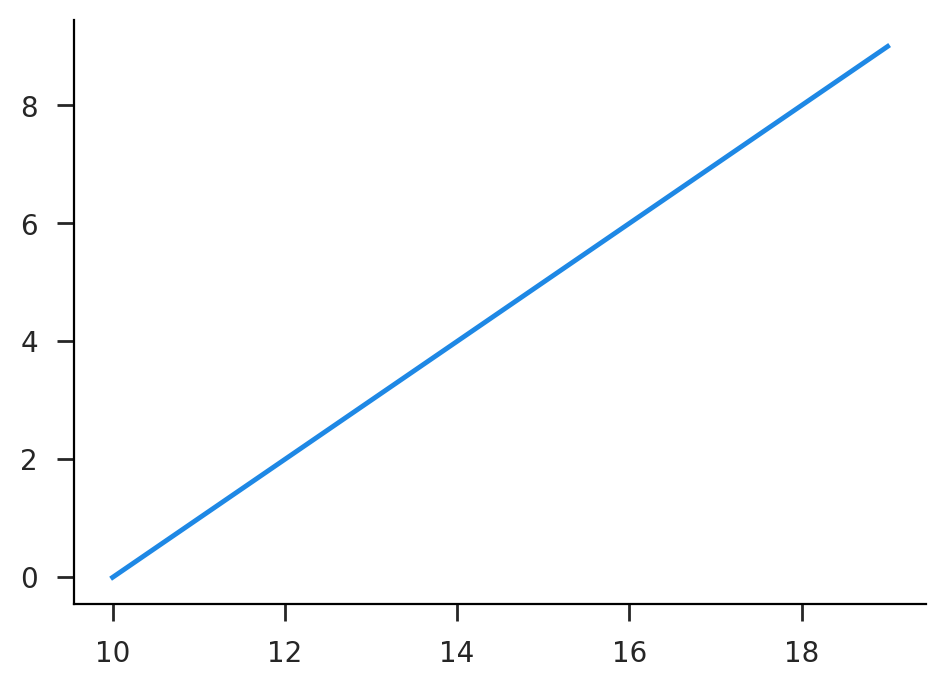

In [67]:
plt.plot(np.arange(10, 20), np.arange(10));

Another useful plot is the histogram for a given array.

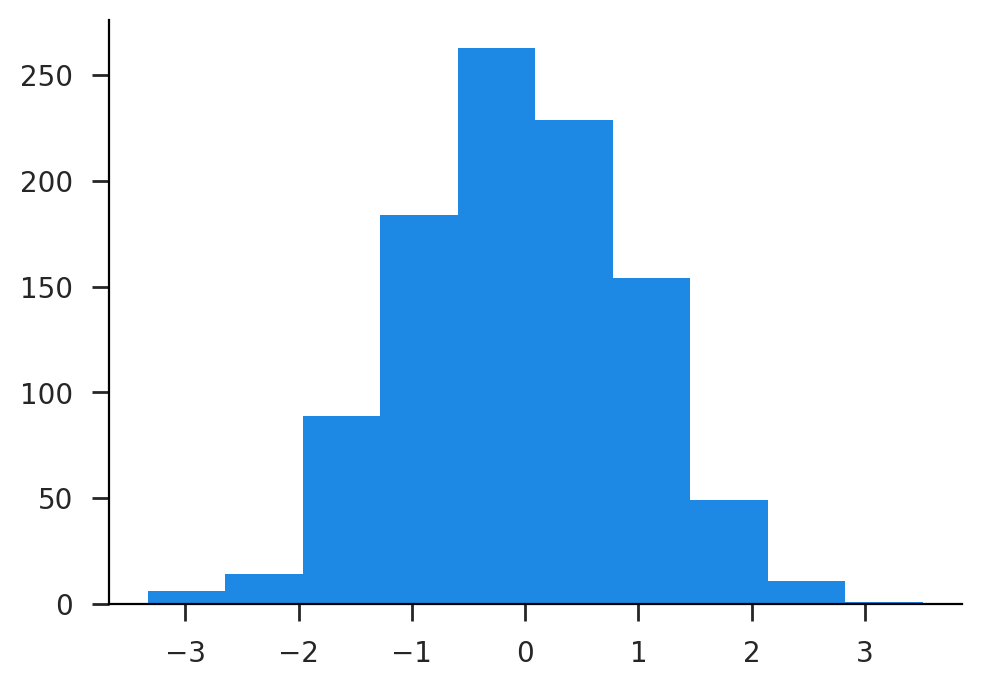

In [68]:
plt.hist(np.random.randn(1000));

Passing a 2d array will treat each column as a separate series.

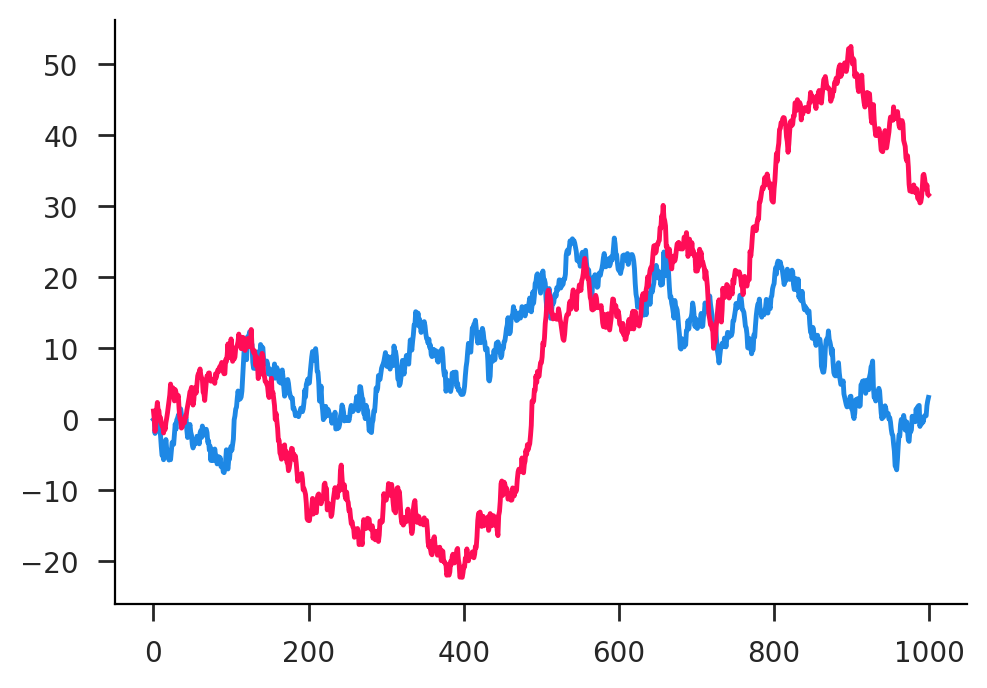

In [70]:
plt.plot(np.cumsum(np.random.randn(1000, 2), axis=0));

### Data with `pandas`

In [71]:
import pandas as pd

A `Series` is a 1-D array with an attached index, which defaults to `range(n)`.

In [74]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.185459
11    0.947054
12    0.620941
13    0.677210
14    0.428261
15    0.699120
16    0.828754
17    0.215353
18    0.623805
19    0.679220
dtype: float64

Let's look at the underlying data

In [75]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.18545867 0.94705393 0.62094138 0.67720985 0.4282612  0.69912019
 0.82875414 0.21535327 0.62380505 0.67921995]


Or get a quick summary of a numeric series

In [76]:
s.describe()

count    10.000000
mean      0.590518
std       0.245908
min       0.185459
25%       0.476431
50%       0.650507
75%       0.694145
max       0.947054
dtype: float64

A `DataFrame` is like a dictionary of `Series` with a common index

In [77]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.185459,0.038782
11,0.947054,-1.535639
12,0.620941,-0.980943
13,0.677210,0.007174
14,0.428261,0.205036


We can get summary stats for each column.

In [78]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.590518,0.234001
std,0.245908,1.083645
min,0.185459,-1.535639
25%,0.476431,-0.090772
50%,0.650507,0.100324
75%,0.694145,0.921442
max,0.947054,2.233067


This makes plotting much more convenient and powerful.

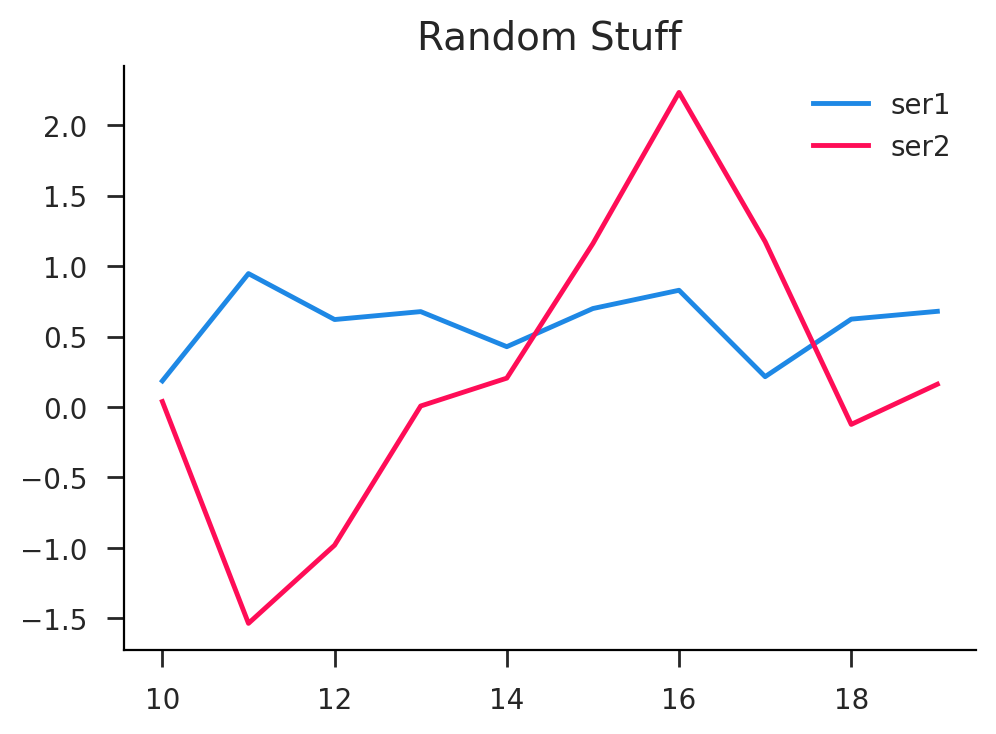

In [82]:
df.plot(title='Random Stuff');

Accessing individual columns yields a Series

In [83]:
df['ser1']

10    0.185459
11    0.947054
12    0.620941
13    0.677210
14    0.428261
15    0.699120
16    0.828754
17    0.215353
18    0.623805
19    0.679220
Name: ser1, dtype: float64

We can perform vector operations on these

In [85]:
df['ser1'] > 0.5

10    False
11     True
12     True
13     True
14    False
15     True
16     True
17    False
18     True
19     True
Name: ser1, dtype: bool

We can select particular rows in this way.

In [87]:
df1 = df[(df['ser1']>0.5) & (df['ser2']<1.0)]
df1

,ser1,ser2
11,0.947054,-1.535639
12,0.620941,-0.980943
13,0.677210,0.007174
18,0.623805,-0.123421
19,0.679220,0.161867


### Regression with `statsmodels`

This import is also non-standard. We're going to use the formula based API.

In [89]:
import statsmodels.formula.api as smf

Gererate some random data with a known causal structure.

In [91]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df0 = pd.DataFrame({'x': x, 'y': y, 'z': z})

Run an OLS regression with a properly specified model.

In [105]:
ret = smf.ols('z ~ 1 + x + y + x:y', data=df0).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6051.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          3.20e-109
Time:                        01:17:27   Log-Likelihood:                -129.82
No. Observations:                 100   AIC:                             267.6
Df Residuals:                      96   BIC:                             278.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9803      0.091     10.820      0.000       0.800       1.160
x              1.9855      0.081     24.553      0.000       1.825       2.146
y              3.0253      0.036     83.635      0.000       2.954       3.097
x:y            3.9928      0.033    120.989      0.000       3.927       4.058
==============================================================================
Omnibus:                        1.599   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.284
Skew:                          -0.063   Prob(JB):                        0.526
Kurtosis:                       2.459   Cond. No.                         3.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can access the parameters and standard errors directly as a series and dataframe

In [106]:
print(ret.params)
print(ret.cov_params())

Intercept    0.980283
x            1.985538
y            3.025330
x:y          3.992819
dtype: float64
           Intercept         x         y       x:y
Intercept   0.008208  0.000008 -0.000096 -0.000162
x           0.000008  0.006539 -0.000104  0.000110
y          -0.000096 -0.000104  0.001308  0.000300
x:y        -0.000162  0.000110  0.000300  0.001089
